# Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import optuna

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocessing & EDA

In [15]:
df = pd.read_csv('~/DS_bootcamp/stavki/data/ratings/international_matches.csv')
df['date'] = pd.to_datetime(df.date)
df.index = df['date']

In [16]:
df.loc[df.home_team.str.contains('China'), 'home_team'] = 'China'
df.loc[df.away_team.str.contains('China'), 'away_team'] = 'China'
df.loc[df.home_team.str.contains('Curaçao'), 'home_team'] = 'Curacao'
df.loc[df.away_team.str.contains('Curaçao'), 'away_team'] = 'Curacao'
df.loc[df.home_team.str.contains('Congo'), 'home_team'] = 'Congo'
df.loc[df.away_team.str.contains('Congo'), 'away_team'] = 'Congo'
df.loc[df.home_team.str.contains('German'), 'home_team'] = 'Germany'
df.loc[df.away_team.str.contains('German'), 'away_team'] = 'Germany'
df.loc[df.home_team.str.contains('Yemen'), 'home_team'] = 'Yemen'
df.loc[df.away_team.str.contains('Yemen'), 'away_team'] = 'Yemen'
df.loc[df.home_team.str.contains('Vietnam'), 'home_team'] = 'Vietnam'
df.loc[df.away_team.str.contains('Vietnam'), 'away_team'] = 'Vietnam'
df.loc[df.home_team.str.contains('Sint Maarten'), 'home_team'] = 'Saint Martin'
df.loc[df.away_team.str.contains('Sint Maarten'), 'away_team'] = 'Saint Martin'
df.loc[df.home_team.str.contains('São Tomé and Príncipe'), 'home_team'] = 'Sao Tome e Principe'
df.loc[df.away_team.str.contains('São Tomé and Príncipe'), 'away_team'] = 'Sao Tome e Principe'
df.home_team = df.home_team.replace('United States Virgin Islands', 'US Virgin Islands')
df.away_team = df.away_team.replace('United States Virgin Islands', 'US Virgin Islands')
df.home_team = df.home_team.replace('United States', 'USA')
df.away_team = df.away_team.replace('United States', 'USA')
df.loc[df.home_team.str.contains('Brunei'), 'home_team'] = 'Brunei'
df.loc[df.away_team.str.contains('Brunei'), 'away_team'] = 'Brunei'
df.loc[df.home_team.str.contains('Cabo'), 'home_team'] = 'Cape Verde'
df.loc[df.away_team.str.contains('Cabo'), 'away_team'] = 'Cape Verde'
df.loc[df.home_team.str.contains('Cape'), 'home_team'] = 'Cape Verde'
df.loc[df.away_team.str.contains('Cape'), 'away_team'] = 'Cape Verde'
df.loc[df.home_team.str.contains('Curaçao'), 'home_team'] = 'Curacao'
df.loc[df.away_team.str.contains('Curaçao'), 'away_team'] = 'Curacao'
df.loc[df.home_team.str.contains('Iran'), 'home_team'] = 'Iran'
df.loc[df.away_team.str.contains('Iran'), 'away_team'] = 'Iran'
df.loc[df.home_team.str.contains('Chinese Taipei'), 'home_team'] = 'China'
df.loc[df.away_team.str.contains('Chinese Taipei'), 'away_team'] = 'China'
df.loc[df.home_team.str.contains('China PR'), 'home_team'] = 'China'
df.loc[df.away_team.str.contains('China PR'), 'away_team'] = 'China'
df.loc[df.home_team.str.contains('Congo DR'), 'home_team'] = 'Congo'
df.loc[df.away_team.str.contains('Congo DR'), 'away_team'] = 'Congo'
df.loc[df.home_team.str.contains('Türkiye'), 'home_team'] = 'Turkey'
df.loc[df.away_team.str.contains('Türkiye'), 'away_team'] = 'Turkey'
df.loc[df.home_team.str.contains('Tomé'), 'home_team'] = 'Sao Tome e Principe'
df.loc[df.away_team.str.contains('Tomé'), 'away_team'] = 'Sao Tome e Principe'
df.loc[df.home_team.str.contains('Korea Republic'), 'home_team'] = 'South Korea'
df.loc[df.away_team.str.contains('Korea Republic'), 'away_team'] = 'South Korea'
df.loc[df.home_team.str.contains('Korea DPR'), 'home_team'] = 'North Korea'
df.loc[df.away_team.str.contains('Korea DPR'), 'away_team'] = 'North Korea'
df.loc[df.home_team.str.contains('Kyrgyz Republic'), 'home_team'] = 'Kyrgyzstan'
df.loc[df.away_team.str.contains('Kyrgyz Republic'), 'away_team'] = 'Kyrgyzstan'
df.loc[df.home_team.str.contains('Netherlands'), 'home_team'] = 'Netherlands'
df.loc[df.away_team.str.contains('Netherlands'), 'away_team'] = 'Netherlands'
df.loc[df.home_team.str.contains('Macedonia'), 'home_team'] = 'North Macedonia'
df.loc[df.away_team.str.contains('Macedonia'), 'away_team'] = 'North Macedonia'
df.loc[df.home_team.str.contains('Zaire'), 'home_team'] = 'Congo'
df.loc[df.away_team.str.contains('Zaire'), 'away_team'] = 'Congo'
df.loc[df.home_team.str.contains('Vincent / Grenadines'), 'home_team'] = 'Saint Vincent and the Grenadines'
df.loc[df.away_team.str.contains('Vincent / Grenadines'), 'away_team'] = 'Saint Vincent and the Grenadines'
df['home_team'] = df['home_team'].str.replace('St.', 'Saint', regex=True)
df['away_team'] = df['away_team'].str.replace('St.', 'Saint', regex=True)

In [17]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
date,,,,,,,,,,,,,,,,,,,,,
2022-06-14,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-14,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-14,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
2022-06-14,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
2022-06-14,2022-06-14,South Korea,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [18]:
home_continent = pd.get_dummies(df.home_team_continent, prefix='home_')
away_continent = pd.get_dummies(df.away_team_continent, prefix='away_')
df = pd.concat([df, home_continent, away_continent], axis=1)

df['dif_rank'] = df.home_team_fifa_rank-df.away_team_fifa_rank
df['dif_points'] = df.home_team_total_fifa_points-df.away_team_total_fifa_points
df['dif_goalkeeper'] = df.home_team_goalkeeper_score-df.away_team_goalkeeper_score
df['dif_defense'] = df.home_team_mean_defense_score-df.away_team_mean_defense_score
df['dif_offense'] = df.home_team_mean_offense_score-df.away_team_mean_offense_score
df['dif_midfield'] = df.home_team_mean_midfield_score-df.away_team_mean_midfield_score

df['ave_rank'] = (df.home_team_fifa_rank+df.away_team_fifa_rank)/2
df['ave_points'] = (df.home_team_total_fifa_points+df.away_team_total_fifa_points)/2
df['ave_goalkeeper'] = (df.home_team_goalkeeper_score+df.away_team_goalkeeper_score)/2
df['ave_defense'] = (df.home_team_mean_defense_score+df.away_team_mean_defense_score)/2
df['ave_offense'] = (df.home_team_mean_offense_score+df.away_team_mean_offense_score)/2
df['ave_midfield'] = (df.home_team_mean_midfield_score+df.away_team_mean_midfield_score)/2

df['home_result'] = df.home_team_result
df['neutral_location'] = df.neutral_location.map({False:0, True:1})
df['shoot_out'] = df.shoot_out.map({'No':0, 'Yes':1})
df['date']=df.date.dt.year
df = df.fillna(0)

In [19]:
df_2 = df.copy()

In [20]:
df = df.drop(['home_team_result', 'home_team_score', 'away_team_score',
              'home_team_continent', 'away_team_continent',
              'home_team', 'away_team', 'tournament', 'city', 'country'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23921 entries, 1993-08-08 to 2022-06-14
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  int64  
 1   home_team_fifa_rank            23921 non-null  int64  
 2   away_team_fifa_rank            23921 non-null  int64  
 3   home_team_total_fifa_points    23921 non-null  int64  
 4   away_team_total_fifa_points    23921 non-null  int64  
 5   neutral_location               23921 non-null  int64  
 6   shoot_out                      23921 non-null  int64  
 7   home_team_goalkeeper_score     23921 non-null  float64
 8   away_team_goalkeeper_score     23921 non-null  float64
 9   home_team_mean_defense_score   23921 non-null  float64
 10  home_team_mean_offense_score   23921 non-null  float64
 11  home_team_mean_midfield_score  23921 non-null  float64
 12  away_team_mean_defense_score 

In [21]:
df.tail()

,date,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,...,dif_defense,dif_offense,dif_midfield,ave_rank,ave_points,ave_goalkeeper,ave_defense,ave_offense,ave_midfield,home_result
date,,,,,,,,,,,,,,,,,,,,,
2022-06-14,2022,180,153,932,1040,0,0,65.0,0.0,0.0,...,0.0,0.0,0.0,166.5,986.0,0.0,0.0,0.00,0.00,Win
2022-06-14,2022,192,135,895,1105,0,0,0.0,65.0,0.0,...,0.0,0.0,0.0,163.5,1000.0,0.0,0.0,0.00,0.00,Lose
2022-06-14,2022,28,60,1526,1387,1,1,79.0,74.0,75.5,...,0.0,0.7,0.0,44.0,1456.5,76.5,75.5,76.35,78.20,Lose
2022-06-14,2022,23,35,1553,1499,0,0,73.0,0.0,75.2,...,4.4,2.7,3.5,29.0,1526.0,0.0,73.0,73.65,75.75,Lose
2022-06-14,2022,29,32,1519,1500,0,0,75.0,0.0,73.0,...,0.0,0.7,3.0,30.5,1509.5,0.0,0.0,79.65,72.30,Win


# Modeling

In [22]:
df['home_result']

date
1993-08-08     Win
1993-08-08    Draw
1993-08-08     Win
1993-08-08     Win
1993-08-08    Lose
              ... 
2022-06-14     Win
2022-06-14    Lose
2022-06-14    Lose
2022-06-14    Lose
2022-06-14     Win
Name: home_result, Length: 23921, dtype: object

In [23]:
X = df.drop('home_result', axis=1)
y = df['home_result'].map({'Lose':-1, 'Draw':0, 'Win':1})
scaler = RobustScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

In [11]:
# def objective(trial):
#     param_grid = {
#         'n_jobs': 10,
#         'multi_class': 'multinomial',
#         'fit_intercept': True,
#         'max_iter': trial.suggest_int('max_iter', 100, 500),
#         'warm_start': trial.suggest_categorical('warm_start', [True, False]),
#     }
    
#     model = LogisticRegression(**param_grid)
#     model.fit(X_train, y_train)
    
#     return accuracy_score(y_test, model.predict(X_test))

# study_lr = optuna.create_study(direction='maximize')
# study_lr.optimize(objective, n_trials=10)

In [25]:
lm = LogisticRegression(multi_class='multinomial', 
                        n_jobs=4, 
                        fit_intercept=True,
                        solver='newton-cg',
                        max_iter=100,
                        warm_start=True)

In [26]:
lm.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', n_jobs=4, solver='newton-cg',
                   warm_start=True)

In [27]:
print(classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.53      0.57      0.55      1345
           0       0.28      0.01      0.01      1068
           1       0.61      0.85      0.71      2372

    accuracy                           0.58      4785
   macro avg       0.47      0.48      0.42      4785
weighted avg       0.51      0.58      0.51      4785



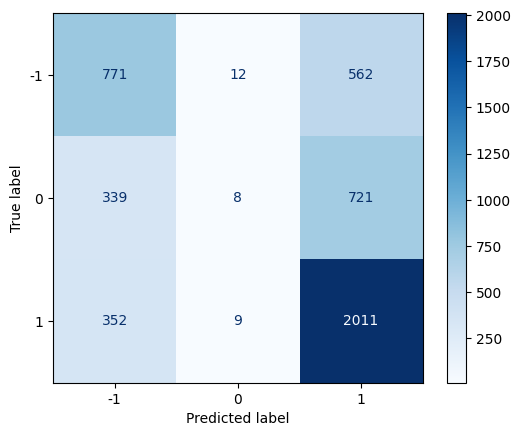

In [28]:
plot_confusion_matrix(lm, X_test, y_test, cmap='Blues')
plt.show()

# KNN

In [29]:
def objective(trial):
    params = {'n_neighbors': trial.suggest_int('n_neighbors', 1, 10),
              'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
              'n_jobs': 10}
    
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=20)

[I 2022-11-17 03:25:35,526] A new study created in memory with name: no-name-249a8e25-36e0-4a86-ad87-2c85e2274384
[I 2022-11-17 03:25:36,079] Trial 0 finished with value: 0.4303030303030303 and parameters: {'n_neighbors': 2, 'algorithm': 'ball_tree'}. Best is trial 0 with value: 0.4303030303030303.
[I 2022-11-17 03:25:36,208] Trial 1 finished with value: 0.46875653082549634 and parameters: {'n_neighbors': 1, 'algorithm': 'brute'}. Best is trial 1 with value: 0.46875653082549634.
[I 2022-11-17 03:25:36,332] Trial 2 finished with value: 0.5352142110762801 and parameters: {'n_neighbors': 7, 'algorithm': 'auto'}. Best is trial 2 with value: 0.5352142110762801.
[I 2022-11-17 03:25:36,448] Trial 3 finished with value: 0.4298850574712644 and parameters: {'n_neighbors': 2, 'algorithm': 'brute'}. Best is trial 2 with value: 0.5352142110762801.
[I 2022-11-17 03:25:36,961] Trial 4 finished with value: 0.46875653082549634 and parameters: {'n_neighbors': 1, 'algorithm': 'ball_tree'}. Best is trial 

In [30]:
knn = KNeighborsClassifier(**study_knn.best_params)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [31]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.50      0.55      0.52      1345
           0       0.30      0.15      0.20      1068
           1       0.64      0.74      0.68      2372

    accuracy                           0.55      4785
   macro avg       0.48      0.48      0.47      4785
weighted avg       0.52      0.55      0.53      4785



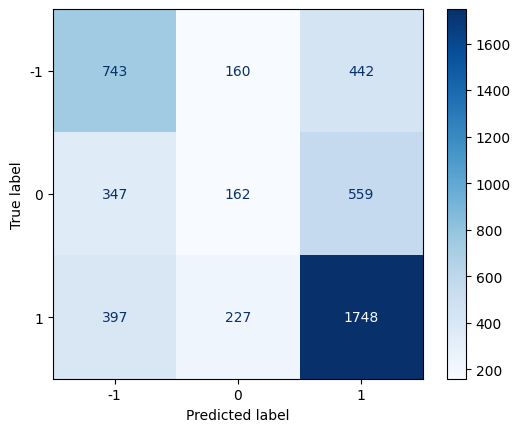

In [32]:
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')  
plt.show()

# Random forest

In [33]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'n_jobs': 10,
        'random_state': 42,
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
    }
    
    model = RandomForestClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=10)

[I 2022-11-17 03:25:54,260] A new study created in memory with name: no-name-192d1f35-718e-4797-9559-1947cd9fb548
[I 2022-11-17 03:25:55,953] Trial 0 finished with value: 0.5811912225705329 and parameters: {'n_estimators': 666, 'criterion': 'entropy', 'max_depth': 7, 'warm_start': True}. Best is trial 0 with value: 0.5811912225705329.
[I 2022-11-17 03:25:57,699] Trial 1 finished with value: 0.5828631138975967 and parameters: {'n_estimators': 766, 'criterion': 'gini', 'max_depth': 7, 'warm_start': False}. Best is trial 1 with value: 0.5828631138975967.
[I 2022-11-17 03:25:58,487] Trial 2 finished with value: 0.5853709508881922 and parameters: {'n_estimators': 318, 'criterion': 'gini', 'max_depth': 8, 'warm_start': True}. Best is trial 2 with value: 0.5853709508881922.
[I 2022-11-17 03:25:59,589] Trial 3 finished with value: 0.5816091954022988 and parameters: {'n_estimators': 450, 'criterion': 'entropy', 'max_depth': 7, 'warm_start': False}. Best is trial 2 with value: 0.5853709508881922

In [34]:
rf = RandomForestClassifier(**study_rf.best_params, n_jobs=10, random_state=42)

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=318, n_jobs=10,
                       random_state=42, warm_start=True)

In [36]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.53      0.57      0.55      1345
           0       0.33      0.00      0.00      1068
           1       0.61      0.86      0.71      2372

    accuracy                           0.59      4785
   macro avg       0.49      0.48      0.42      4785
weighted avg       0.53      0.59      0.51      4785



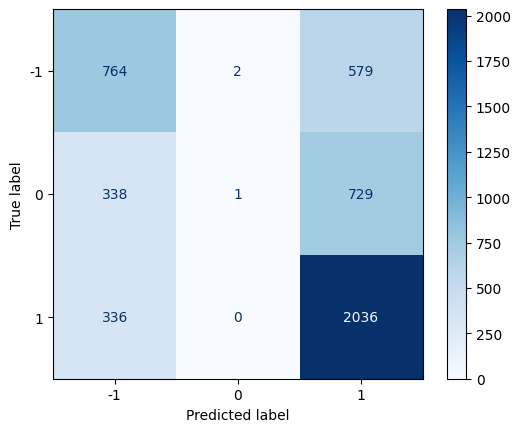

In [37]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')  
plt.show()

# Gradient Boosting

In [38]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_samples_split': trial.suggest_int('min_samples_split', 4, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error', 'mse']),
    }
    
    model = GradientBoostingClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective, n_trials=10)

[I 2022-11-17 03:26:21,847] A new study created in memory with name: no-name-a8c67420-d30f-48b7-8144-a1fe87cbc9fb
[I 2022-11-17 03:26:32,251] Trial 0 finished with value: 0.5732497387669802 and parameters: {'n_estimators': 173, 'learning_rate': 0.0955973903332875, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.5732497387669802.
[I 2022-11-17 03:26:56,790] Trial 1 finished with value: 0.5847439916405434 and parameters: {'n_estimators': 186, 'learning_rate': 0.04524457291771103, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 1 with value: 0.5847439916405434.
[I 2022-11-17 03:27:02,320] Trial 2 finished with value: 0.5851619644723093 and parameters: {'n_estimators': 231, 'learning_rate': 0.0656878134266822, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 4, 'max_features': 'log2', 'criterion':

In [26]:
gb = GradientBoostingClassifier(**study_gb.best_params)

In [27]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.06173698663843177, max_depth=7,
                           max_features='log2', min_samples_leaf=3,
                           min_samples_split=10, n_estimators=134)

In [28]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      2413
           1       0.69      0.66      0.68      2372

    accuracy                           0.69      4785
   macro avg       0.69      0.69      0.69      4785
weighted avg       0.69      0.69      0.69      4785



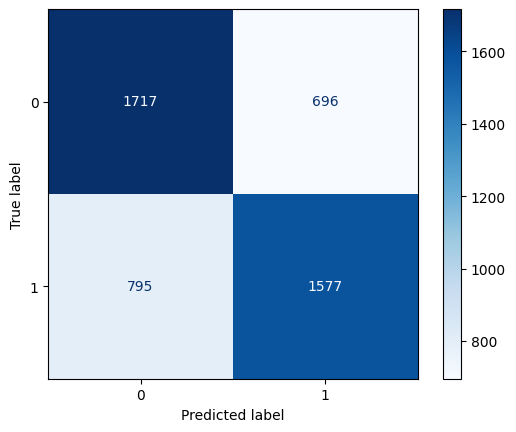

In [29]:
plot_confusion_matrix(gb, X_test, y_test, cmap='Blues')  
plt.show()

# LGBMClassifier

In [30]:
def objective(trial):
    param_grid = {'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                  'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
                  'num_leaves': trial.suggest_int('num_leaves', 3, 50),
                 }

    model = LGBMClassifier(**param_grid, random_state=42, n_jobs=2)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective, n_trials=20)

[I 2022-11-16 20:03:14,833] A new study created in memory with name: no-name-d6af5a53-6e40-4fe2-a60e-eba217f94c46
[I 2022-11-16 20:03:15,587] Trial 0 finished with value: 0.6917450365726228 and parameters: {'n_estimators': 330, 'learning_rate': 0.03954625905335289, 'num_leaves': 22}. Best is trial 0 with value: 0.6917450365726228.
[I 2022-11-16 20:03:17,011] Trial 1 finished with value: 0.6829676071055382 and parameters: {'n_estimators': 567, 'learning_rate': 0.07770559732332234, 'num_leaves': 30}. Best is trial 0 with value: 0.6917450365726228.
[I 2022-11-16 20:03:17,691] Trial 2 finished with value: 0.6898641588296761 and parameters: {'n_estimators': 377, 'learning_rate': 0.06313491561592788, 'num_leaves': 15}. Best is trial 0 with value: 0.6917450365726228.
[I 2022-11-16 20:03:19,255] Trial 3 finished with value: 0.683594566353187 and parameters: {'n_estimators': 819, 'learning_rate': 0.0753483577152234, 'num_leaves': 21}. Best is trial 0 with value: 0.6917450365726228.
[I 2022-11-1

In [31]:
lgbm = LGBMClassifier(**study_lgbm.best_params, random_state=42, n_jobs=2)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.03991104381831895, n_estimators=120, n_jobs=2,
               num_leaves=26, random_state=42)

In [32]:
print(classification_report(y_test, lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      2413
           1       0.69      0.69      0.69      2372

    accuracy                           0.69      4785
   macro avg       0.69      0.69      0.69      4785
weighted avg       0.69      0.69      0.69      4785



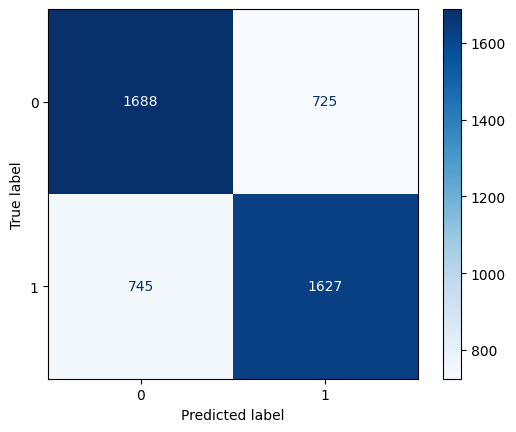

In [33]:
plot_confusion_matrix(lgbm, X_test, y_test, cmap='Blues')
plt.show()

# XGBClassifier

In [34]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_leaves': trial.suggest_int('max_leaves', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
    }

    model = XGBClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=20)

[I 2022-11-16 20:03:37,052] A new study created in memory with name: no-name-0b9b08c3-c6f6-4166-9239-09a7a02f9848
[I 2022-11-16 20:03:43,370] Trial 0 finished with value: 0.6815047021943573 and parameters: {'n_estimators': 199, 'max_depth': 12, 'max_leaves': 14, 'learning_rate': 0.07932440213040151}. Best is trial 0 with value: 0.6815047021943573.
[I 2022-11-16 20:03:43,900] Trial 1 finished with value: 0.690700104493208 and parameters: {'n_estimators': 21, 'max_depth': 8, 'max_leaves': 5, 'learning_rate': 0.04283263021171373}. Best is trial 1 with value: 0.690700104493208.
[I 2022-11-16 20:03:46,968] Trial 2 finished with value: 0.6787878787878788 and parameters: {'n_estimators': 67, 'max_depth': 14, 'max_leaves': 3, 'learning_rate': 0.0690854052776911}. Best is trial 1 with value: 0.690700104493208.
[I 2022-11-16 20:03:49,992] Trial 3 finished with value: 0.6884012539184953 and parameters: {'n_estimators': 182, 'max_depth': 7, 'max_leaves': 6, 'learning_rate': 0.08067738385304364}. B

In [35]:
xgb = XGBClassifier(**study_xgb.best_params, n_jobs=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.031116318380904614, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=138, n_jobs=10, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [36]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      2413
           1       0.69      0.69      0.69      2372

    accuracy                           0.69      4785
   macro avg       0.69      0.69      0.69      4785
weighted avg       0.69      0.69      0.69      4785



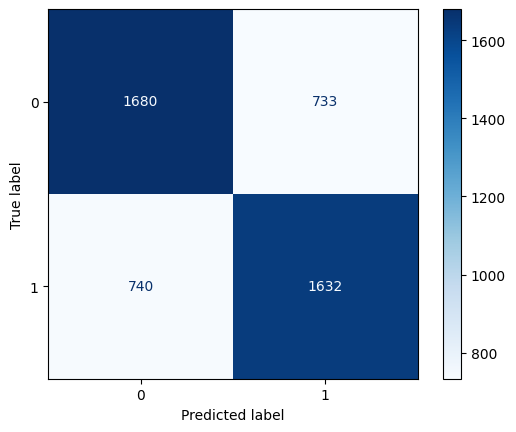

In [37]:
plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues')
plt.show()

# CatBoost

In [38]:
cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10,loss_function='MultiClass')
cb.fit(X_train, y_train)

0:	learn: 0.6761918	total: 86.7ms	remaining: 1m 26s
1:	learn: 0.6623628	total: 115ms	remaining: 57.3s
2:	learn: 0.6504673	total: 141ms	remaining: 46.8s
3:	learn: 0.6405217	total: 166ms	remaining: 41.4s
4:	learn: 0.6317982	total: 192ms	remaining: 38.3s
5:	learn: 0.6240805	total: 218ms	remaining: 36.2s
6:	learn: 0.6171534	total: 249ms	remaining: 35.3s
7:	learn: 0.6112020	total: 280ms	remaining: 34.7s
8:	learn: 0.6062864	total: 319ms	remaining: 35.1s
9:	learn: 0.6019253	total: 362ms	remaining: 35.8s
10:	learn: 0.5980958	total: 410ms	remaining: 36.8s
11:	learn: 0.5948611	total: 465ms	remaining: 38.3s
12:	learn: 0.5919829	total: 514ms	remaining: 39s
13:	learn: 0.5894972	total: 571ms	remaining: 40.2s
14:	learn: 0.5869840	total: 623ms	remaining: 40.9s
15:	learn: 0.5845877	total: 664ms	remaining: 40.9s
16:	learn: 0.5824797	total: 704ms	remaining: 40.7s
17:	learn: 0.5803142	total: 741ms	remaining: 40.4s
18:	learn: 0.5787401	total: 776ms	remaining: 40.1s
19:	learn: 0.5770707	total: 813ms	remaini

In [39]:
print(classification_report(y_test, cb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2413
           1       0.68      0.66      0.67      2372

    accuracy                           0.68      4785
   macro avg       0.68      0.68      0.68      4785
weighted avg       0.68      0.68      0.68      4785



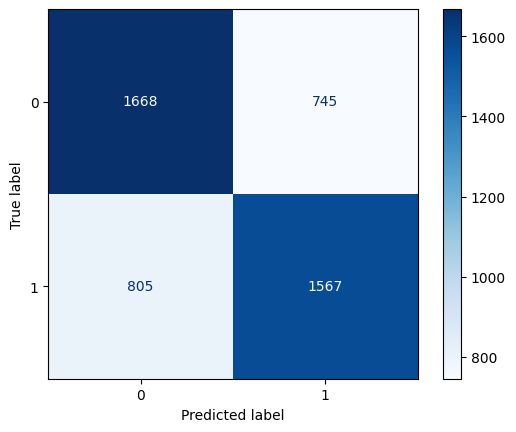

In [40]:
plot_confusion_matrix(cb, X_test, y_test, cmap='Blues')  
plt.show()

# Stacking

In [41]:
n_estimators = [('lm', lm), 
                ('knn', knn),
                ('rf', rf), 
                ('gb', gb), 
                ('lgbm', lgbm), 
                ('xgb', xgb), 
                ('cb', cb)]

sc = StackingClassifier(estimators=n_estimators, final_estimator=XGBClassifier(), n_jobs=4)
sc.fit(X_train, y_train)

/Users/aleksandrabudaeva/miniforge3/lib/python3.10/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6761918	total: 171ms	remaining: 2m 50s
1:	learn: 0.6623628	total: 310ms	remaining: 2m 34s
2:	learn: 0.6504673	total: 412ms	remaining: 2m 16s
3:	learn: 0.6405217	total: 528ms	remaining: 2m 11s
4:	learn: 0.6317982	total: 589ms	remaining: 1m 57s
5:	learn: 0.6240805	total: 650ms	remaining: 1m 47s
6:	learn: 0.6171534	total: 715ms	remaining: 1m 41s
7:	learn: 0.6112020	total: 789ms	remaining: 1m 37s
8:	learn: 0.6062864	total: 873ms	remaining: 1m 36s
9:	learn: 0.6019253	total: 934ms	remaining: 1m 32s
10:	learn: 0.5980958	total: 1.01s	remaining: 1m 30s
11:	learn: 0.5948611	total: 1.07s	remaining: 1m 28s
12:	learn: 0.5919829	total: 1.13s	remaining: 1m 26s
13:	learn: 0.5894972	total: 1.19s	remaining: 1m 24s
14:	learn: 0.5869840	total: 1.26s	remaining: 1m 22s
15:	learn: 0.5845877	total: 1.31s	remaining: 1m 20s
16:	learn: 0.5824797	total: 1.37s	remaining: 1m 19s
17:	learn: 0.5803142	total: 1.43s	remaining: 1m 18s
18:	learn: 0.5787401	total: 1.5s	remaining: 1m 17s
19:	learn: 0.5770707	to

/Users/aleksandrabudaeva/miniforge3/lib/python3.10/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6760832	total: 226ms	remaining: 3m 45s
0:	learn: 0.6762208	total: 246ms	remaining: 4m 5s
0:	learn: 0.6759724	total: 239ms	remaining: 3m 59s
0:	learn: 0.6770176	total: 244ms	remaining: 4m 3s
1:	learn: 0.6623968	total: 475ms	remaining: 3m 56s
1:	learn: 0.6620535	total: 500ms	remaining: 4m 9s
1:	learn: 0.6632846	total: 536ms	remaining: 4m 27s
1:	learn: 0.6616914	total: 576ms	remaining: 4m 47s
2:	learn: 0.6505916	total: 678ms	remaining: 3m 45s
2:	learn: 0.6516440	total: 746ms	remaining: 4m 8s
2:	learn: 0.6501144	total: 747ms	remaining: 4m 8s
2:	learn: 0.6500394	total: 884ms	remaining: 4m 53s
3:	learn: 0.6403343	total: 936ms	remaining: 3m 52s
3:	learn: 0.6398454	total: 1.13s	remaining: 4m 40s
3:	learn: 0.6412206	total: 1.12s	remaining: 4m 38s
3:	learn: 0.6396305	total: 1.12s	remaining: 4m 39s
4:	learn: 0.6312674	total: 1.24s	remaining: 4m 7s
4:	learn: 0.6308845	total: 1.34s	remaining: 4m 25s
4:	learn: 0.6310896	total: 1.35s	remaining: 4m 28s
4:	learn: 0.6332295	total: 1.35s	rema

StackingClassifier(estimators=[('lm',
                                LogisticRegression(multi_class='multinomial',
                                                   n_jobs=4, solver='newton-cg',
                                                   warm_start=True)),
                               ('knn', KNeighborsClassifier(n_neighbors=9)),
                               ('rf',
                                RandomForestClassifier(max_depth=8,
                                                       n_estimators=875,
                                                       n_jobs=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.06173698663843177,
                                                           max_depth=7,
                                                           max_features=...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...),
                   n_jobs=4)

In [92]:
print(classification_report(y_test, sc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2413
           1       0.68      0.68      0.68      2372

    accuracy                           0.68      4785
   macro avg       0.68      0.68      0.68      4785
weighted avg       0.68      0.68      0.68      4785



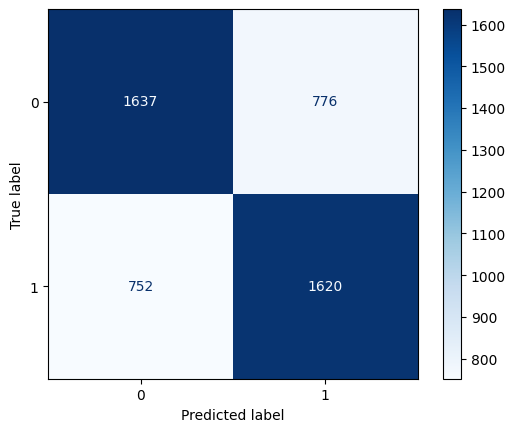

In [93]:
plot_confusion_matrix(sc, X_test, y_test, cmap='Blues')
plt.show()

# NN

In [44]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, random_split

from torchsummary import summary

from tqdm.notebook import tqdm

import torchvision.transforms as T
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.models import resnet50, ResNet50_Weights

from copy import deepcopy

In [45]:
n_features=X.shape[1]

In [46]:
dataset = TensorDataset(torch.Tensor(X.to_numpy()), 
                        torch.Tensor(y.to_numpy()))

In [47]:
train_ds, valid_ds = random_split(dataset, (X.shape[0]-4000, 4000))

In [48]:
train_loader = DataLoader(train_ds, shuffle=True, batch_size=64)
valid_loader = DataLoader(valid_ds, shuffle=True, batch_size=64)

In [49]:
def plot_loss_metrics(tl: list, vl: list, tm: list, vm: list):

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(tl, label='Train loss')
    ax[0].plot(vl, label='Valid Loss')
    ax[0].legend()
    ax[0].set_title('Loss')

    ax[1].plot(tm, label='Train accuracy')
    ax[1].plot(vm, label='Valid accuracy')
    ax[1].legend()
    ax[1].set_title('Accuracy')

In [62]:
model2 = nn.Sequential(
    nn.Linear(n_features, 9),
    nn.Linear(9, 9),
    nn.Linear(9, 2),
    nn.Softmax(dim=1),
)

summary(model2, (n_features, ), batch_size=128)
history2 = None

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 9]             360
            Linear-2                   [128, 9]              90
            Linear-3                   [128, 2]              20
           Softmax-4                   [128, 2]               0
Total params: 470
Trainable params: 470
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [51]:
def train_model2(model, epochs, history=None):
    history = history or {
        'train_accs': [],
        'train_losses': [],
        'test_accs': [],
        'test_losses': [],
    }
    
    max_acc = 0
    
    start_epoch = len(history['train_accs'])
    for epoch in range(start_epoch+1, start_epoch+epochs+1):
        # print(f'{"-"*13} Epoch {epoch} {"-"*13}')
        print('=', end='')
        
        model.train()
        batch_accs = []
        batch_losses = [] 
        for x_train_batch, y_train_batch in train_loader: 
            y_train_batch = y_train_batch.type(torch.LongTensor)
            y_pred = model(x_train_batch)
            loss = criterion(y_pred, y_train_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == y_train_batch).numpy().mean())
            
        history['train_accs'].append(np.mean(batch_accs))
        history['train_losses'].append(np.mean(batch_losses))

        # Validation
        model.eval()
    
        batch_accs = []
        batch_losses = []
        for x_test_batch, y_test_batch in valid_loader:
            y_test_batch = y_test_batch.type(torch.LongTensor)
            y_pred = model(x_test_batch)
            loss = criterion(y_pred, y_test_batch)
            
            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == y_test_batch).numpy().mean())
            
        history['test_accs'].append(np.mean(batch_accs))
        history['test_losses'].append(np.mean(batch_losses))
        
        if np.mean(batch_losses) > max_acc:
            max_acc = np.mean(batch_losses)
            best_model = deepcopy(model)
    print('100%')                            
    return history

In [63]:
optimizer = optim.Adagrad(model2.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

In [72]:
history2 = train_model2(model2, 300, history2)

============================================================================================================================================================================================================================================================================================================100%


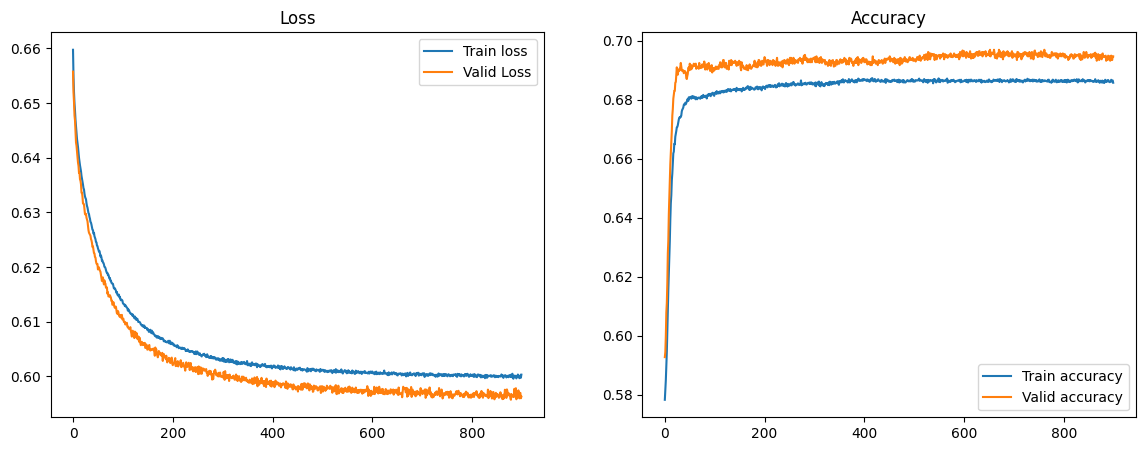

In [73]:
plot_loss_metrics(history2['train_losses'], history2['test_losses'], history2['train_accs'], history2['test_accs'])

In [74]:
model2.eval()
pred2 = model2(valid_ds.dataset.tensors[0]).argmax(axis=1)

confusion_matrix(valid_ds.dataset.tensors[1].tolist(), pred2.tolist())

array([[8524, 3636],
       [3838, 7923]])

In [75]:
print(classification_report(valid_ds.dataset.tensors[1].tolist(), pred2.tolist()))

              precision    recall  f1-score   support

         0.0       0.69      0.70      0.70     12160
         1.0       0.69      0.67      0.68     11761

    accuracy                           0.69     23921
   macro avg       0.69      0.69      0.69     23921
weighted avg       0.69      0.69      0.69     23921



# Predicting

In [78]:
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [79]:
teams = [['Qatar', 'Ecuador', 'Senegal', 'Netherlands'], 
         ['England', 'Iran', 'USA', 'Wales'], 
         ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'], 
         ['France', 'Australia', 'Denmark', 'Tunisia'], 
         ['Spain', 'Costa Rica', 'Germany', 'Japan'], 
         ['Belgium', 'Canada', 'Morocco', 'Croatia'],
         ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'], 
         ['Portugal', 'Ghana', 'Uruguay', 'South Korea']]

df_2['date'] = df_2.index
cols_home = ['home_team', 'date']+[col for col in X if col.startswith('home_')]
cols_away = ['away_team', 'date']+[col for col in X if col.startswith('away_')]
home = df_2[cols_home].loc[df_2['home_team'].isin(sum(teams, []))]
away = df_2[cols_away].loc[df_2['away_team'].isin(sum(teams, []))]
home = home.groupby('home_team').agg(['last']).reset_index()
away = away.groupby('away_team').agg(['last']).reset_index()
home.columns = cols_home
away.columns = cols_home
team_data = pd.concat([home, away])
team_data.index = team_data['date']
team_data = team_data.groupby('home_team').agg(['last']).reset_index()
team_data.columns = cols_home
team_data['date'] = 2022

In [81]:
test=None
for group in teams:
    for team in combinations(group, 2):
        row1 = team_data.loc[team_data.home_team==team[0]].reset_index(drop=True)
        row1.columns = cols_home
        row1 = row1.drop('date', axis=1)
        row2 = team_data.loc[team_data.home_team==team[1]].reset_index(drop=True)
        row2.columns = cols_away
        row2 = row2.drop('date', axis=1)
        row = pd.concat([row1, row2], axis=1)
        row = row.reindex(['home_team', 'away_team']+X.columns.tolist(), axis=1)
        
        row['date'] = 2022
        row['dif_rank'] = row.home_team_fifa_rank-row.away_team_fifa_rank
        row['dif_points'] = row.home_team_total_fifa_points-row.away_team_total_fifa_points
        row['dif_goalkeeper'] = row.home_team_goalkeeper_score-row.away_team_goalkeeper_score
        row['dif_defense'] = row.home_team_mean_defense_score-row.away_team_mean_defense_score
        row['dif_offense'] = row.home_team_mean_offense_score-row.away_team_mean_offense_score
        row['dif_midfield'] = row.home_team_mean_midfield_score-row.away_team_mean_midfield_score

        row['ave_rank'] = (row.home_team_fifa_rank+row.away_team_fifa_rank)/2
        row['ave_points'] = (row.home_team_total_fifa_points+row.away_team_total_fifa_points)/2
        row['ave_goalkeeper'] = (row.home_team_goalkeeper_score+row.away_team_goalkeeper_score)/2
        row['ave_defense'] = (row.home_team_mean_defense_score+row.away_team_mean_defense_score)/2
        row['ave_offense'] = (row.home_team_mean_offense_score+row.away_team_mean_offense_score)/2
        row['ave_midfield'] = (row.home_team_mean_midfield_score+row.away_team_mean_midfield_score)/2

        row['neutral_location'] = 0
        row['shoot_out'] = 0
        
        test = pd.concat([test, row], axis=0)

In [117]:
test = test.reset_index(drop=True)

In [118]:
test_ml = pd.DataFrame(scaler.transform(test.drop(['home_team', 'away_team'], axis=1)), 
                       columns = test.drop(['home_team', 'away_team'], axis=1).columns)

In [121]:
predicted = pd.concat([test.home_team, test.away_team,
                       pd.DataFrame(lm.predict_proba(test_ml), columns=['lm_away', 'lm_home']),
                       pd.DataFrame(knn.predict_proba(test_ml), columns=['knn_away', 'knn_home']),
                       pd.DataFrame(rf.predict_proba(test_ml), columns=['rf_away', 'rf_home']),
                       pd.DataFrame(gb.predict_proba(test_ml), columns=['gb_away', 'gb_home']),
                       pd.DataFrame(lgbm.predict_proba(test_ml), columns=['lgbm_away', 'lgbm_home']),
                       pd.DataFrame(xgb.predict_proba(test_ml), columns=['xgb_away', 'xgb_home']),
                       pd.DataFrame(cb.predict_proba(test_ml), columns=['cb_away', 'cb_home']),
                       pd.DataFrame(sc.predict_proba(test_ml), columns=['sc_away', 'sc_home'])], axis=1)

In [127]:
test_nn = TensorDataset(torch.Tensor(test_ml.to_numpy()))

In [135]:
model2.eval()
pred2 = model2(test_nn.tensors[0])

In [149]:
predicted = pd.concat([predicted, pd.DataFrame(pred2.detach().numpy(), columns=['nn_away', 'nn_home'])], axis=1)

In [151]:
predicted.columns

Index(['home_team', 'away_team', 'lm_away', 'lm_home', 'knn_away', 'knn_home',
       'rf_away', 'rf_home', 'gb_away', 'gb_home', 'lgbm_away', 'lgbm_home',
       'xgb_away', 'xgb_home', 'cb_away', 'cb_home', 'sc_away', 'sc_home',
       'nn_away', 'nn_home'],
      dtype='object')

In [157]:
predicted['mean_away'] = predicted[['lm_away', 
                                    'knn_away', 
                                    'rf_away', 
                                    'gb_away', 
                                    'lgbm_away', 
                                    'xgb_away', 
                                    'cb_away',
                                    'sc_away',
                                    'nn_away']].mean(axis=1)

In [158]:
predicted['mean_home'] = predicted[['lm_home', 
                                    'knn_home', 
                                    'rf_home', 
                                    'gb_home', 
                                    'lgbm_home', 
                                    'xgb_home', 
                                    'cb_home',
                                    'sc_home',
                                    'nn_home']].mean(axis=1)

In [164]:
pwd

'/Users/aleksandrabudaeva/DS_bootcamp/stavki/scripts'

In [168]:
predicted.to_csv('~/DS_bootcamp/stavki/data/ratings/predicted2.csv')